In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from obj_func import *

import sklearn
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial import distance_matrix

import kmapper as km
from kmapper.plotlyviz import *
from kmapper import jupyter
import networkx as nx


from sklearn.cluster import DBSCAN

#from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In this notebook we recreate some of the Mapper graphs presented in the paper https://arxiv.org/pdf/1904.11044.pdf

In [2]:
alien = ObjectFile("10469_GrayAlien_v01.obj")

Unimplemented OBJ format statement 'Tf' on line '	Tf 1.0000 1.0000 1.0000'
Unimplemented OBJ format statement 'g' on line 'g 10469_GrayAlien_v01'
Unimplemented OBJ format statement 's' on line 's 2'
Unimplemented OBJ format statement 'Tf' on line '	Tf 1.0000 1.0000 1.0000'
Unimplemented OBJ format statement 'g' on line 'g 10469_GrayAlien_v01'
Unimplemented OBJ format statement 's' on line 's 2'


In [3]:
alien_np = alien.df.to_numpy()

In the paper, all 3D objects were standardised to have height 1 in $\mathbb{R}^3$

In [4]:
scaler = MinMaxScaler()
scaler.fit(alien_np)
#print(scaler.data_max_)
data = scaler.transform(alien_np)

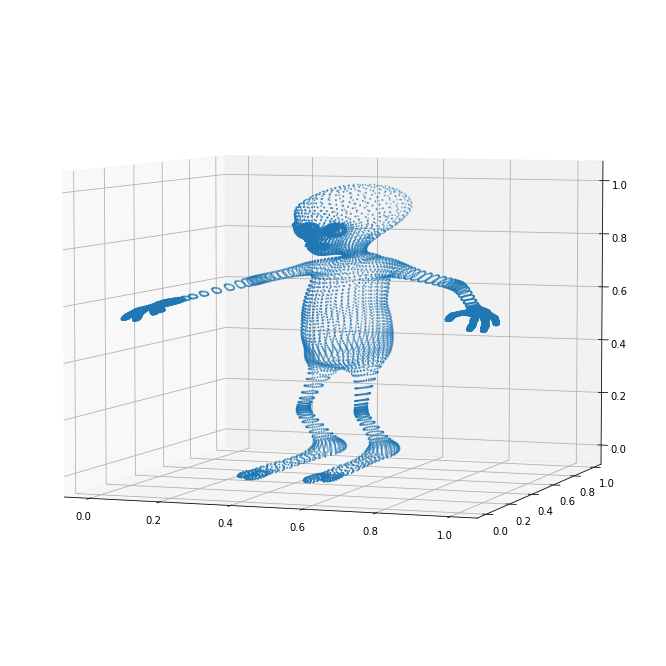

In [5]:
#plotting the data to get the alien
x = data[:,0]
y = data[:,1]
z = data[:,2]

fig = plt.figure(figsize = (20,12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x,y,z, s=1)
ax.view_init(5, -70)
plt.show()

The paper uses the method of connected components of the $\epsilon$-neighbouring graph (DBSCAN)

# Centrality function filter

There's a Scipy function called distance_matrix which returns the matrix of all pair-wise distances.

In [6]:
def centrality(data):
    distances = distance_matrix(data,data)
    sums = np.sum(distances, axis=0)
    centrality = sums/distances.shape[0]
    values = np.array([[i] for i in centrality])
    return values

In [7]:
cen = centrality(data)

In [8]:
#initiate the mapper object
mapper = km.KeplerMapper(verbose = 0)

#this would filter using the z coordinate as before
#lens = mapper.fit_transform(data, projection = [2])

# Define the simplicial complex using different parameters. Note that lens=cen
graph = mapper.map(cen,
                   data,
                   cover = km.Cover(n_cubes=5, perc_overlap=0.2),
                   clusterer = DBSCAN(eps =.1))

# Visualize it
html = mapper.visualize(graph, 
                        color_values= cen,
                        color_function_name = 'centrality',
                        node_color_function = ['median', 'max', 'average'], 
                        path_html="alien.html",
                        title="Alien")

# Inline display
# jupyter.display(path_html="http://mlwave.github.io/tda/word2vec-gender-bias.html")
jupyter.display(path_html="alien.html")

Same graph but colored by height.

In [9]:
#initiate the mapper object
mapper = km.KeplerMapper(verbose = 0)

#this would filter using the z coordinate as before
height = mapper.fit_transform(data, projection = [2])

# Define the simplicial complex using different parameters. Note that lens=cen
graph = mapper.map(cen,
                   data,
                   cover = km.Cover(n_cubes=7, perc_overlap=0.15),
                   clusterer = DBSCAN(eps =.1))

# Visualize it
html = mapper.visualize(graph, 
                        color_values= height,
                        color_function_name = 'height',
                        node_color_function = ['median', 'max', 'average'], 
                        path_html="alien.html",
                        title="Alien")

# Inline display
# jupyter.display(path_html="http://mlwave.github.io/tda/word2vec-gender-bias.html")
jupyter.display(path_html="alien.html")

# Using $k$-means clusters

In [10]:
#initiate the mapper object
mapper = km.KeplerMapper(verbose = 0)

#this would filter using the z coordinate as before
height = mapper.fit_transform(data, projection = [2])

# Define the simplicial complex using different parameters. Note that lens=cen
graph = mapper.map(cen,
                   data,
                   cover = km.Cover(n_cubes=10, perc_overlap=0.2),
                   clusterer = sklearn.cluster.KMeans(n_clusters=5,
                                                       random_state=3471))

# Visualize it
html = mapper.visualize(graph, 
                        color_values= height,
                        color_function_name = 'height',
                        node_color_function = ['median', 'max', 'average'], 
                        path_html="alien_epsilon.html",
                        title="Alien")

# Inline display
jupyter.display(path_html="alien_epsilon.html")